## 第三章 线性模型

 - 3.1 一元线性回归
 - 3.2 多元线性回归
 - 3.3 对数几率回归
 - 3.4 线性判别分析

### 一元线性回归——Advertising广告预测

使用advertising-dataset广告预测数据集：
1.	打乱数据顺序，取前70%的数据作为训练集，后30%的数据作为测试集
2.	分别以TV, Radio, Newspaper三种特征作为模型的输入，Sales作为模型的输出
3.	在训练集上，使用最小二乘法求解模型参数（需自己实现，不允许第三方库完成）
4.	计算三个模型在测试集上的MAE和RMSE这两种指标的大小（需自己实现，不允许第三方库完成）
5.	分别绘制模型的在训练集和测试集上的曲线
6.	选做：尝试去除训练集中的异常值或离群值后再次训练模型，绘制模型的预测曲线，观察模型在测试集上预测能力的变化


In [1]:
#加载包
import numpy as np 
import pandas as pd
# 使用pandas读取csv数据
data = pd.read_csv('data/advertising/advertising.csv')
# 打印前5行
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### 针对第三步，自行实现最小二乘法

本实验要求使用最小二乘法求解一元线性回归模型  
求解$w$和$b$使均方误差$E_{(w,b)} = \sum^m_{i=1}(y_i - wx_i - b)^2$最小化的过程，称为线性回归模型的最小二乘“参数估计”(parameter estimation)。我们可将$E_{(w,b)}$分别对$w$和$b$求导，得到
$$\tag{4}
\frac{\partial E_{(w,b)}}{\partial w} = 2(w \sum^m_{i=1} x^2_i - \sum^m_{i=1} (y_i - b) x_i),
$$

$$\tag{5}
\frac{\partial E_{(w,b)}}{\partial b} = 2(mb - \sum^m_{i=1}(y_i - w x_i))
$$

然后令式(4)和式(5)为0，可得到$w$和$b$的闭式解(closed-form solution)
$$\tag{6}
w = \frac{\sum^m_{i=1} y_i(x_i - \bar{x})}{\sum^m_{i=1}x^2_i - \frac{1}{m}(\sum^m_{i=1}x_i)^2}
$$

$$\tag{7}
b = \frac{1}{m}\sum^m_{i=1}(y_i - w x_i)
$$
其中，$\bar{x} = \frac{1}{m}\sum^m_{i=1}x_i$为$x$的均值

In [2]:
def get_w(x, y):
    '''
    这个函数是计算模型w的值的函数，
    传入的参数分别是x和y，表示数据与标记
    Parameter
    ----------
        x: np.ndarray，pd.Series，传入的特征数据

        y: np.ndarray, pd.Series，对应的标记
    
    Returns
    ----------
        w: float, 模型w的值
    '''
    return w

In [3]:
def get_b(x, y, w):
    '''
    这个函数是计算模型b的值的函数，
    传入的参数分别是x, y, w，表示数据，标记以及模型的w值
    
    Parameter
    ----------
        x: np.ndarray，pd.Series，传入的特征数据

        y: np.ndarray, pd.Series，对应的标记
        
        w: np.ndarray, pd.Series，模型w的值
    
    Returns
    ----------
        b: float, 模型b的值
    '''
    return b

In [4]:
class myLinearRegression:
    def __init__(self):
        '''
        类的初始化方法，不需要初始化的参数
        这里设置了两个成员变量，用来存储模型w和b的值
        '''
        self.w = None
        self.b = None
    
    def fit(self, x, y):
        '''
        这里需要编写训练的函数，也就是调用模型的fit方法，传入特征x的数据和标记y的数据
        这个方法就可以求解出w和b
        '''
        # 请你补充求解w和b过程
        # YOUR CODE HERE
        
    def predict(self, x):
        '''
        这是预测的函数，传入特征的数据，返回模型预测的结果
        '''
        if self.w == None or self.b == None:
            print("模型还未训练，请先调用fit方法训练")
            return 
        
        return self.w * x + self.b

#### 针对第四步，自行实现MAE和RMSE

模型训练完成后，还需要在测试集上验证其预测能力，这就需要计算模型的一些性能指标，如MAE和RMSE等。

$$\tag{8}
MAE(\hat{y}, y) = \frac{1}{m} \sum^m_{i=1} \vert \hat{y} - y \vert
$$

$$\tag{9}
RMSE(\hat{y}, y) = \sqrt{\frac{1}{m} \sum^m_{i=1} (\hat{y} - y)^2}
$$
其中，$\hat{y}$是模型的预测值，$y$是真值，$m$是样本数

In [5]:
def MAE():
    # 请你完成MAE的计算过程
    # YOUR CODE HERE
    return 

In [6]:
def RMSE():
    # 请你完成RMSE的计算过程
    # YOUR CODE HERE
    return 

#### 针对第五步，可视化模型预测效果

In [7]:
#借助绘图工具
import matplotlib.pyplot as plt

In [8]:
# 可参考的函数
# plt.figure(figsize = ())
# plt.plot()
# plt.xlabel()
# plt.ylabel()
# plt.title()
# plt.legend()

#### 针对第六步，去除训练集中的异常值或离群值后再次训练模型

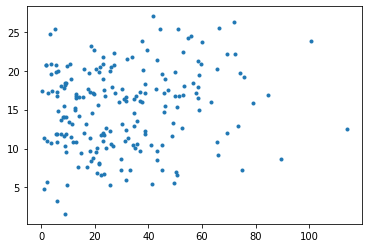

In [9]:
plt.plot(data['Newspaper'],data['Sales'],'.')

### 多元线性回归——Advertising广告预测

1.使用多个特征作为输入完成广告预测问题\
2.计算模型在十折交叉验证上MAE和RMSE的值，比较不同的特征组合在模型预测能力上的影响。\
模型可使用sklearn.linear_model.LinearRegression \
3.选做：多项式回归（一元线性回归的扩展），尝试对部分特征进行变换，如将其二次幂，三次幂作为特征输入模型，观察模型在预测能力上的变化。


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

####  使用sklearn完成一元线性回归的十折交叉验证验证

In [26]:
model = LinearRegression()
prediction = cross_val_predict(model, data[['TV']],data['Sales'], cv = 10)

####  使用sklearn完成MAE和RMSE

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#### 选择多种特征进行组合，完成多元线性回归，并对比不同的特征组合，它们训练出的模型在十折交叉验证上MAE与RMSE的差别，至少完成3组

In [30]:
def trainAndPredict(features, label, model, cv = 10):
    # YOUR CODE HERE
    return mae,rmse

###### 双击此处填写
1. 模型1使用的特征：
2. 模型2使用的特征：
3. 模型3使用的特征:

模型|MAE|RMSE
-|-|-
模型1 | 0.0 | 0.0
模型2 | 0.0 | 0.0
模型3 | 0.0 | 0.0

### 对数几率回归——手机市场价分类

使用mobile_price数据集对手机市场价进行分类
1.	此数据集不存在缺失值但存在不合逻辑的值，例如部分样本的手机屏幕宽度sc_w特征为0，要求使用数据集时首先进行清洗以剔除这些错误样本
2.	原数据中手机价格总共有4类，为让其适用于对数几率回归二分类，要求对价格类别进行合并（0：低，1：较低，2：较高，3：高）0和1归为一类，2和3归为一类，使用对数几率回归实现对手机价格的二分类
3.	计算十折交叉验证下的精度，查准率，查全率，F1分数
4.	模型使用sklearn.linear_model.LogisticRegression 同时要求理解其求解方法，分别尝试最大迭代次数100，1000，5000设置，分析不同结果的可能原因


In [31]:
import numpy as np
import pandas as pd

In [33]:
# 读取数据
data = pd.read_csv('data/mobile_phone/train.csv', delimiter=',')
# 查看数据集的特征信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### 针对1）去除异常值

In [34]:
# 查看sc_w列中值为0的样本数量
print(len(data[(data.sc_w == 0)].index.tolist()))

180


In [36]:
# 删除sc_w值为0所在的所有行
# data =  data.drop()
# # 查看删除后的数据的信息
# data.info()

#### 针对2）转化为2分类

In [38]:
# data.loc

#### 针对3）计算十折交叉验证下的精度，查准率，查全率，F1分数

In [42]:
from sklearn.linear_model import LogisticRegression #关注函数中的max_iter参数
#评价指标函数
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
#模型训练
# YOUR CODE HERE

#模型评估
# YOUR CODE HERE

###### 双击此处填写

迭代次数|精度|查准率|查全率|F1
-|-|-|-|-
100 | 
1000 | 
5000 | 

### 线性判别分析——手机价格分类

使用mobile_price数据集对手机市场价进行分类
1.	此数据集不存在缺失值但存在不合逻辑的值，例如部分样本的手机屏幕宽度sc_w特征为0，要求使用数据集时首先进行清洗以剔除这些错误样本
2.	原数据中手机价格总共有4类，要求对价格类别进行合并（0：低，1：较低，2：较高，3：高）0和1归为一类，2和3归为一类，使用线性判别分析实现对手机价格的二分类
3.	计算十折交叉验证下的精度，查准率，查全率，F1分数
4.	模型使用sklearn.discriminant_analysis.LinearDiscriminantAnalysis 同时要求理解其求解方法
5. 选做：利用 sklearn.processing里的标准化、归一化等方法对特征进行变换，分析变换对预测结果的影响。【同样采用十折交叉验证和相同的指标】

In [47]:
# 数据加载及处理同上

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing

In [49]:
#模型训练
# YOUR CODE HERE

#模型评估
# YOUR CODE HERE

#### 针对选做，填写以下表格

###### 双击此处填写
1. 模型1的处理流程： 
2. 模型2的处理流程： 
3. 模型3的处理流程:   

模型|数据集|精度|查准率|查全率|F1
-|-|-|-|-|-
模型1 | 数据集 | 0.0 | 0.0 | 0.0 | 0.0
模型2 | 数据集 | 0.0 | 0.0 | 0.0 | 0.0
模型3 | 数据集 | 0.0 | 0.0 | 0.0 | 0.0

### 多分类学习

- 1.分别实现一对一，一对其余，多对多的拆分策略，分类器要求任选上述所学中的一种。
- 2.数据集选择鸢尾花数据集，随机划分20%作为测试集，根据测试集的精度(accuracy)，查准率(precision)，查全率(recall)，F1值分析拆分策略的优劣。（让学生掌握多分类学习任务的策略）
- 3.观察三种方法在实验结果上的差异，分析其原因
- 4.选做：选取前两列特征进行训练，并对训练结果进行可视化

将多分类任务拆为多个二分类任务求解，一般有 3 种拆分策略：
- （1）OvO（一对一，One vs One）：假如数据 D 中有 N 个类别，将 N 个类别进行两两配对，产生 N（N-1）/2 个二分类器，在预测中，将测试样本输入这 N（N-1）/2 个二分类器中得到相应个数的预测结果，然后再将被预测结果数最多的（Voting）作为最终分类结果。
- （2）OvR（一对其余，One vs Rest）: 将一个类别作为正例，其余所有类别作为反例，这样 N 个类别可以产生 N 个二分类器，将测试样本输入这些二分类器中中得到 N 个预测结果，如果仅有一个分类器预测为正类，则将对应的预测结果作为最终预测结果。如果有多个分类器预测为正类，则选择置信度最大的类别作为最终分类结果。
- （3）MvM（多对多，Many vs Many）：将数据集中的若干个类作为正例，若干个其他类作为反例。MvM 的正、反类构造必须有特殊的设计，而不是随意选取，通常采用“纠错输出码（ECOC）”，产生编码矩阵后划分类别。

参考文献：
https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OutputCodeClassifier.html https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html

In [54]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [64]:
#加载鸢尾花数据集
data_iris = datasets.load_iris()
x, y = data_iris.data, data_iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 0)  

In [65]:
# 使用multiclass的OvO多分类策略
# YOUR CODE HERE

# 使用multiclass的OvR多分类策略
# YOUR CODE HERE

#借助OutputCodeClassifier 实现多对多
# YOUR CODE HERE

#### 汇总三种方法结果，比较并尝试分析原因

###### 双击此处填写

模型|分类器|精度|查准率|查全率|F1
-|-|-|-|-|-
OvO |  |  0.0 | 0.0 | 0.0  | 0.0
OvR |  |0.0 | 0.0 | 0.0 | 0.0
MvM |  | 0.0 | 0.0 | 0.0 | 0.0

#### 选做：选取前两列特征，任选上述三种方法之一进行重新训练，可视化实验结果

In [100]:
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl 
#参考：借助plt.pcolormesh，plt.scatter，工具